## PCA
We wanted to try to have multiple variations of the data in order to see if we can fit a better model.  
We will use the PCA algorithm to reduce the dimensionality of the binary data.

In [122]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [123]:
clean_df = pd.read_csv('data/dataframes/df_after_cols_reduction.csv').iloc[:,1:]
clean_df.shape

(10070, 1795)

In [124]:
cat_cols = ['company_name','company_about', 'founded', 'business model','employees','product stage','status','fund_stage','suceeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in clean_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in clean_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in clean_df.columns if col.startswith("sector_")]
target_ind_list = [col for col in clean_df.columns if col.startswith("industry_")]
technology_list = [col for col in clean_df.columns if col.startswith("technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [125]:
print("Number of categorical and numerical columns: ", len(cat_cols) + len(num_cols))
print("Number of binary columns: ", len(bin_cols))


Number of categorical and numerical columns:  14
Number of binary columns:  1781


Besided 14 categorical and numerical columns, we see there are 1781 binary columns in our data.  
We can divide the binary columns into 5 groups:  
<li> The company's tags columns.</li>
<li> The company's target markets columns.</li>
<li> The company's sectors columns.</li>
<li> The company's target industries columns.</li>
<li> The company's used technologies columns.</li>

For each column group, we will use PCA algorithm and add new x,y columns to the categorical and numerical data:

In [38]:
pca_df = clean_df[cat_cols + num_cols].copy()
cols_dic = {'tag_cols':tag_cols, 'targetmarket_cols':targetmarket_cols, 'sector_list':sector_list, 'target_ind_list':target_ind_list, 'technology_list':technology_list, 'bin_cols':bin_cols} 

print(f"Size before adding PCA cols: {pca_df.shape}")
pca_cols = []
for key, value in cols_dic.items():
    pca = pd.DataFrame(PCA(n_components=2).fit_transform(clean_df[value]), columns = ['x','y'])
    
    pca_df[f'{key}_x'] = list(pca['x'])
    pca_df[f'{key}_y'] = list(pca['y'])
    
    pca_cols.append((f'{key}_x',f'{key}_y'))

print(f"Size after adding PCA cols: {pca_df.shape}")

Size before adding PCA cols: (10070, 14)
Size after adding PCA cols: (10070, 26)


The dataframe now consists of all categorical and numerical columns, and 12 more columns:  
2 columns for each of the 5 groups of binary columns + 2 columns generated by PCA algorithm from all binary cols.

We will plot the data now for each column group:

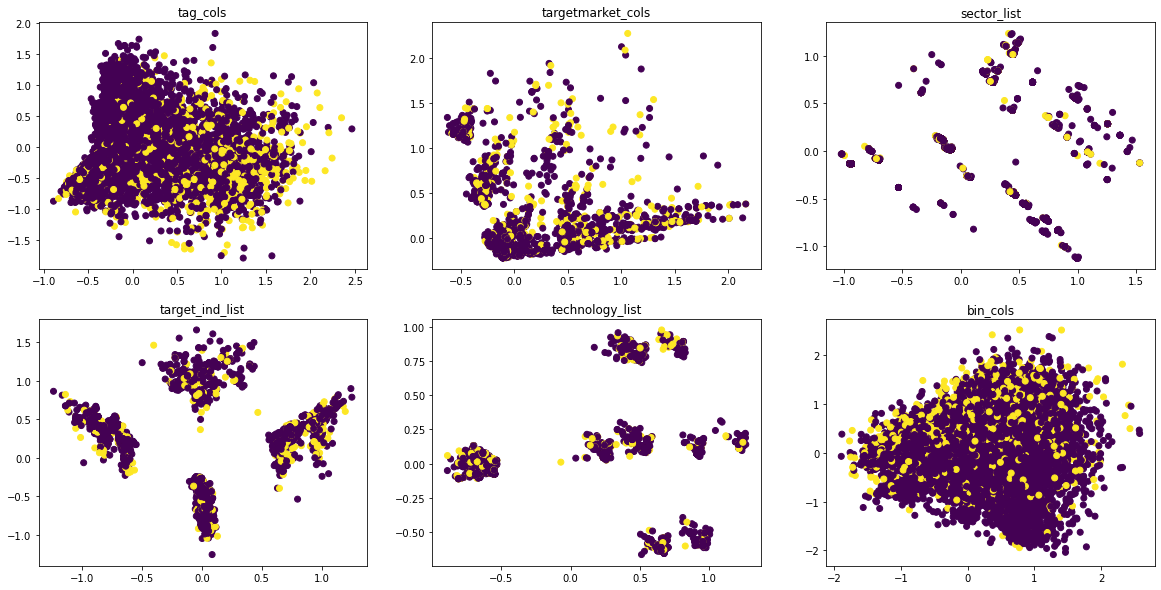

In [35]:
number_of_plot_cols = 3
if len(cols_dic) % 3 == 0:
    number_of_plot_rows = int(len(cols_dic) / 3)
else:
    number_of_plot_rows = int(math.floor(len(cols_dic) / 3) + 1)

fig, axes = plt.subplots(number_of_plot_rows,number_of_plot_cols, figsize=(20,10))

k = 0
for i in range(number_of_plot_rows):
    for j in range(number_of_plot_cols):

        if k >= len(cols_dic):
            break
        
        axes[i,j].scatter(pca_df[pca_cols[k][0]], pca_df[pca_cols[k][1]], c=clean_df['suceeded'])
        axes[i,j].set_title(list(cols_dic.keys())[k])
        k += 1

plt.show()

We see some groups can be devided into smaller groups.  
But from first glance, we can't see any relationship between the groups.  
Next stage will be to train the machine learning model on the PCA dataframe and the binary dataframe.

In [37]:
pca_df.to_csv('data/dataframes/pca_df.csv')

# (Extra) 3D graphs

In [127]:
pca_df = clean_df[cat_cols + num_cols].copy()
cols_dic = {'tag_cols':tag_cols, 'targetmarket_cols':targetmarket_cols, 'sector_list':sector_list, 'target_ind_list':target_ind_list, 'technology_list':technology_list, 'bin_cols':bin_cols} 

print(f"Size before adding PCA cols: {pca_df.shape}")
pca_cols = []
for key, value in cols_dic.items():
    pca = pd.DataFrame(PCA(n_components=3).fit_transform(clean_df[value]), columns = ['x','y','z'])
    
    pca_df[f'{key}_x'] = list(pca['x'])
    pca_df[f'{key}_y'] = list(pca['y'])
    pca_df[f'{key}_z'] = list(pca['z'])
    
    pca_cols.append([f'{key}_x',f'{key}_y',f'{key}_z'])

print(f"Size after adding PCA cols: {pca_df.shape}")

Size before adding PCA cols: (10070, 14)
Size after adding PCA cols: (10070, 32)


In [133]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x=pca_cols[4][0], y=pca_cols[4][1], z=pca_cols[4][2], color=clean_df['suceeded'])
fig.show()
fig = px.scatter_3d(pca_df, x=pca_cols[2][0], y=pca_cols[2][1], z=pca_cols[2][2], color=clean_df['suceeded'])
fig.show()